In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import astropy
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import simple_norm
from astropy.coordinates import SkyCoord  
import configparser
import time
from astropy.table import Table

In [14]:
def Quick(cluster,Filter,ra,dec,rad):
    path = '/Users/brian.merino/Desktop/JWST/RELICS/'
    
    print(item)
    
    if item == 'f435w' or item == 'f606w' or item == 'f814w':
        file = "smacs0723-%s_drc_sci.fits"%item
        file_wht = "smacs0723-%s_drc_wht.fits"%item
    
    else:
        file = "smacs0723-%s_drz_sci.fits"%(item)
        file_wht = "smacs0723-%s_drz_wht.fits"%(item)
        
    #Source's coordinates
    obj = [[ra, dec]] #Ra and Dec
    
    #Length is the amount of pixels to the center of the x or y axis
    scale  = 1
    
    #Optional radius for plotting component at the end in pixels
    rad = rad
    
    #Load in image
    pf       = fits.open(path+file)
    pf_wht   = fits.open(path+file_wht)
    head     = pf[0].header
    head_wht = pf_wht[0].header
    data     = pf[0].data
    data_wht = pf_wht[0].data
    wcs      = WCS(path+file)
    norm     = simple_norm(data, 'sqrt', percent=99.5)
    pw       = WCS(header=head)
    pixobjs  = pw.wcs_world2pix(obj,1)
    
    x1 = int(round(pixobjs[0][0] - (scale*length)))
    x2 = int(round(pixobjs[0][0] + (scale*length)))
    y1 = int(round(pixobjs[0][1] - (scale*length)))
    y2 = int(round(pixobjs[0][1] + (scale*length)))
    
    subimg = data[y1:y2,x1:x2]
    subimg_wht = data_wht[y1:y2,x1:x2]
     
    #This part will update the thumbnail's header
    head['crval1'],head['crval2'] = obj[0][0],obj[0][1]
    head['crpix1'] = int(pixobjs[0][0]) - x1
    head['crpix2'] = int(pixobjs[0][1]) - y1
    
    head_wht['crval1'],head_wht['crval2'] = obj[0][0],obj[0][1]
    head_wht['crpix1'] = int(pixobjs[0][0]) - x1
    head_wht['crpix2'] = int(pixobjs[0][1]) - y1
    
    
    hdu = fits.PrimaryHDU(subimg,header=head)
    hdu.writeto(save_to,overwrite=True)
    
    hdu_wht = fits.PrimaryHDU(subimg_wht,header=head_wht)
    hdu_wht.writeto(save_to_wht,overwrite=True)
    
    print()
    print('Thumbnail saved as: '+save_to)
    
    # The plotting code below is to visually verify that the coordinates are correct.
    fig = plt.figure()
    p1 = fig.add_subplot(111, projection=wcs)
    p1.imshow(data,norm=norm,origin='lower',cmap='Greys_r')
    
    xi = int(round(pixobjs[0][0]- (scale*length)))
    xf = int(round(pixobjs[0][0]+ (scale*length)))
    yi = int(round(pixobjs[0][1]- (scale*length)))
    yf = int(round(pixobjs[0][1]+ (scale*length)))
    
    p1.set_title('Source')
    p1.set_xlim(xi,xf)
    p1.set_ylim(yi,yf)
    
    
    circle = plt.Circle((pixobjs[0][0], pixobjs[0][1]), rad, color='r', fill=False, lw=2)
    p1.add_artist(circle)
    
    save_to2 = root + '%s-%i.png'%(Filter,Id)
    plt.savefig(save_to2,overwrite=True,facecolor='white')
    plt.show()

In [15]:
prephot_path = '/Users/brian.merino/Desktop/JWST/RELICS/large_clump_sources.cat'
prephot = Table.read(prephot_path,format='ascii')

prephot.show_in_notebook()

f105w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f105w-1906.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


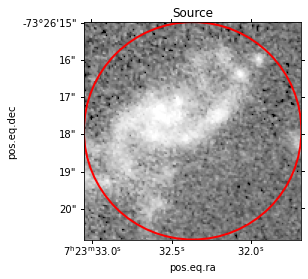

f125w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f125w-1906.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


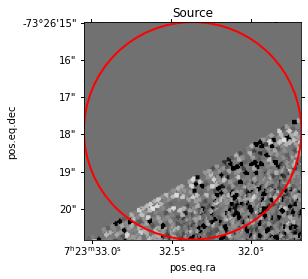

f140w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f140w-1906.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


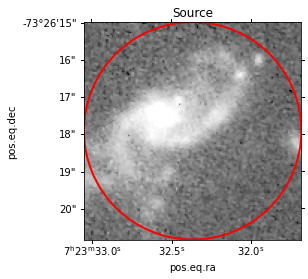

f160w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f160w-1906.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


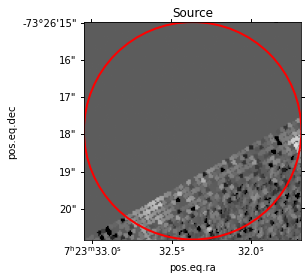

f435w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f435w-1906.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


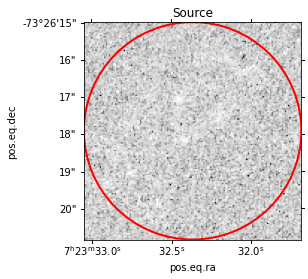

f606w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f606w-1906.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


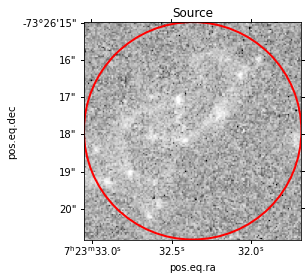

f814w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f814w-1906.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


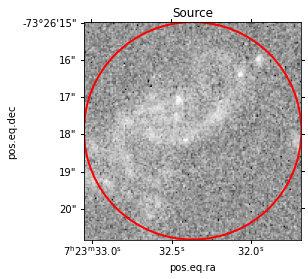

f105w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f105w-1932.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


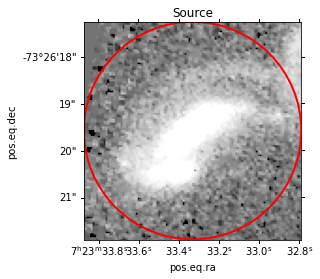

f125w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f125w-1932.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


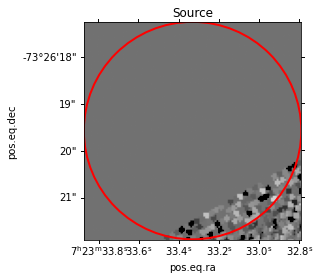

f140w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f140w-1932.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


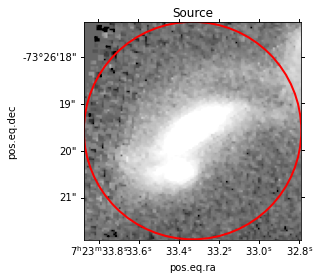

f160w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f160w-1932.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


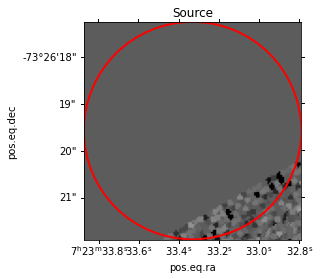

f435w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f435w-1932.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


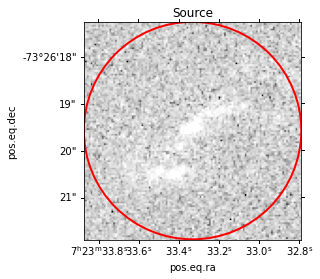

f606w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f606w-1932.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


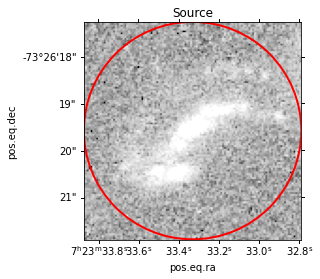

f814w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f814w-1932.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


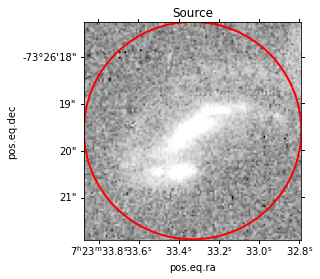

f105w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f105w-2038.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


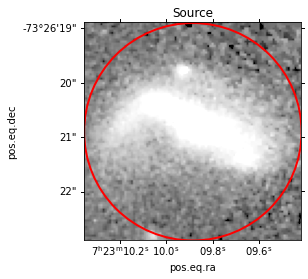

f125w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f125w-2038.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


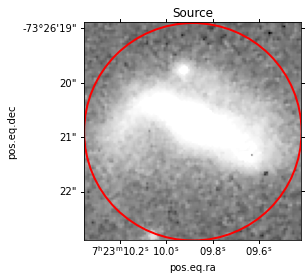

f140w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f140w-2038.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


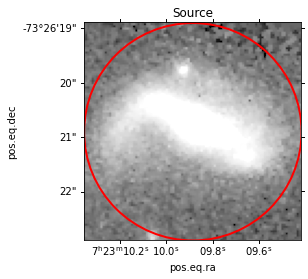

f160w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f160w-2038.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


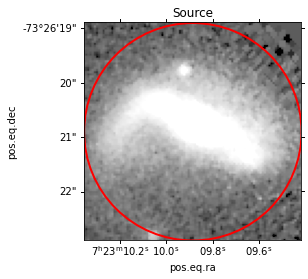

f435w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f435w-2038.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


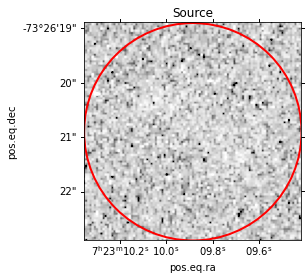

f606w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f606w-2038.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


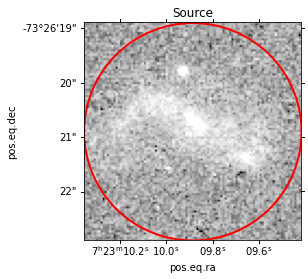

f814w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f814w-2038.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


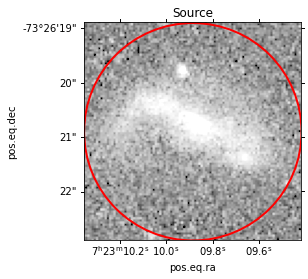

f105w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f105w-2363.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


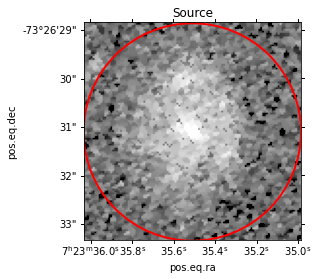

f125w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f125w-2363.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


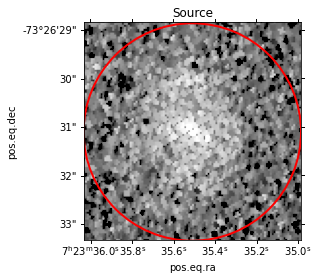

f140w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f140w-2363.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


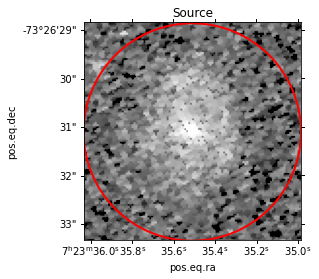

f160w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f160w-2363.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


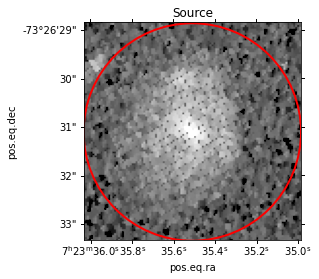

f435w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f435w-2363.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


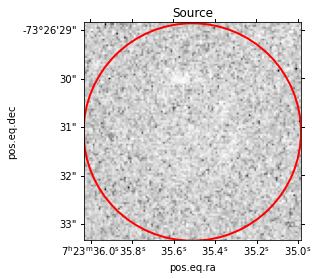

f606w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f606w-2363.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


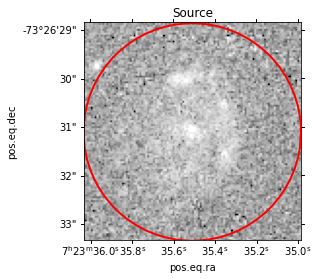

f814w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f814w-2363.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


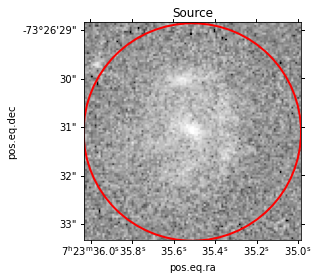

f105w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f105w-2549.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


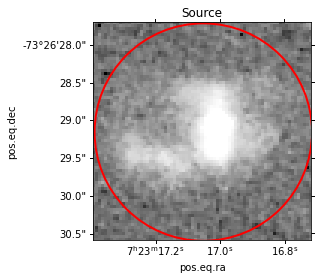

f125w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f125w-2549.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


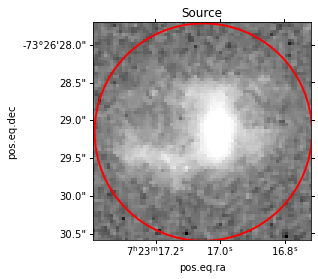

f140w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f140w-2549.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


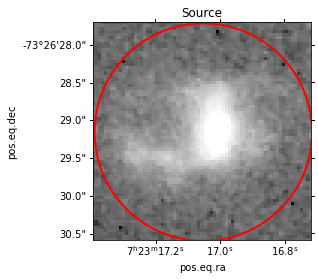

f160w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f160w-2549.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


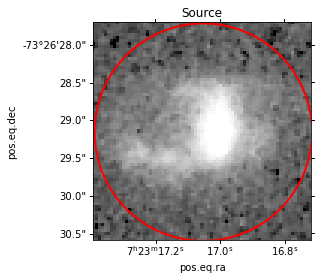

f435w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f435w-2549.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


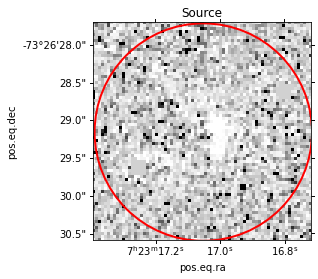

f606w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f606w-2549.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


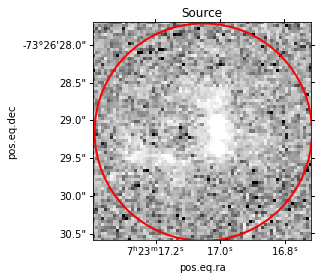

f814w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f814w-2549.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


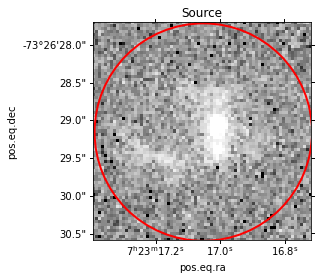

f105w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f105w-2868.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


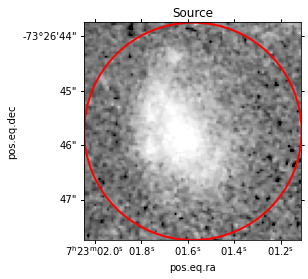

f125w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f125w-2868.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


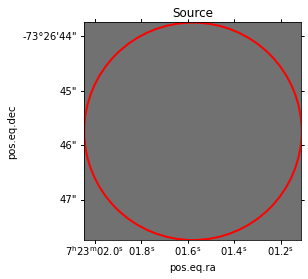

f140w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f140w-2868.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


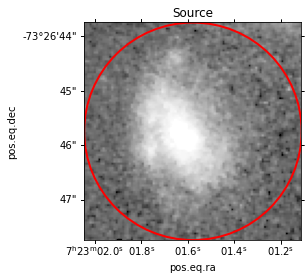

f160w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f160w-2868.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


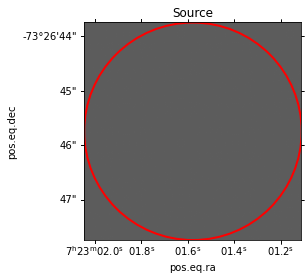

f435w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f435w-2868.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


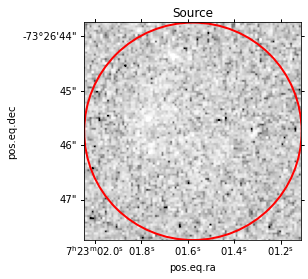

f606w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f606w-2868.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


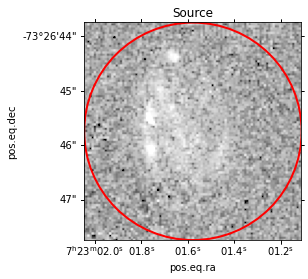

f814w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f814w-2868.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


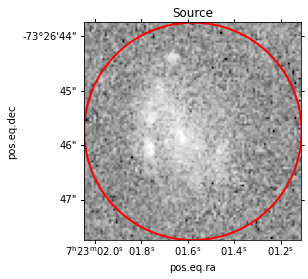

f105w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f105w-2896.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


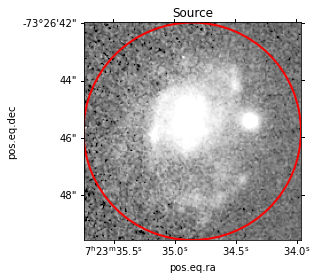

f125w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f125w-2896.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


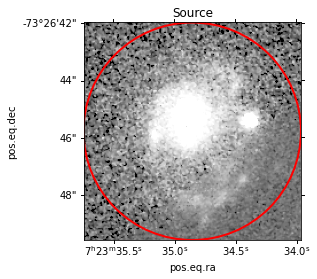

f140w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f140w-2896.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


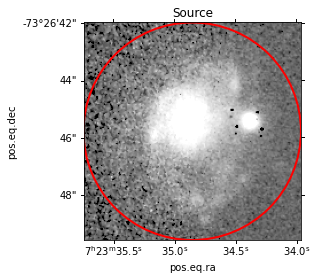

f160w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f160w-2896.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


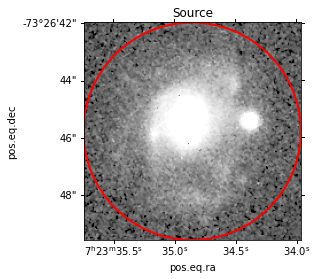

f435w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f435w-2896.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


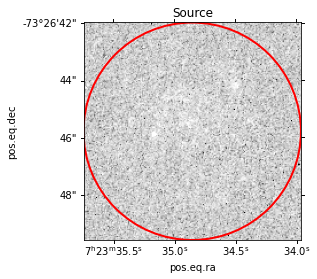

f606w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f606w-2896.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


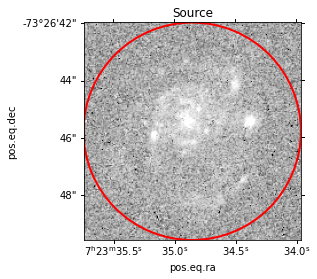

f814w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f814w-2896.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


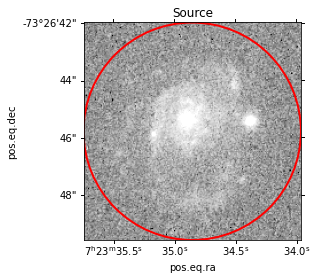

f105w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f105w-3225.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


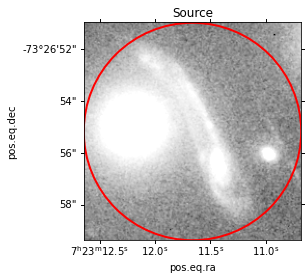

f125w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f125w-3225.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


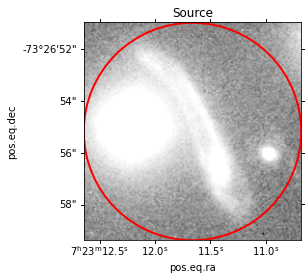

f140w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f140w-3225.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


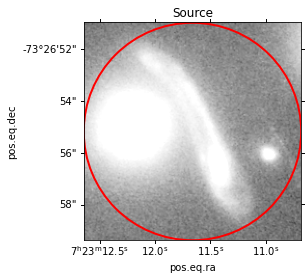

f160w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f160w-3225.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


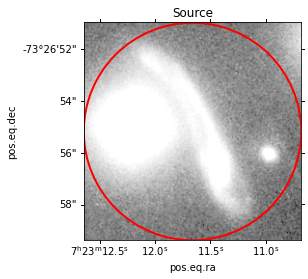

f435w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f435w-3225.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


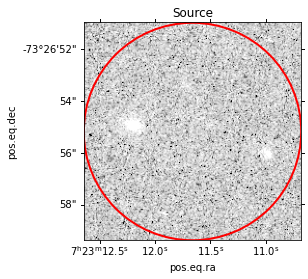

f606w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f606w-3225.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


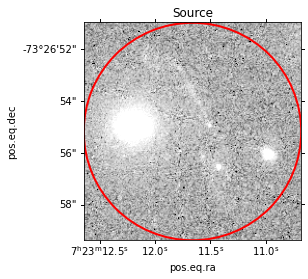

f814w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f814w-3225.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


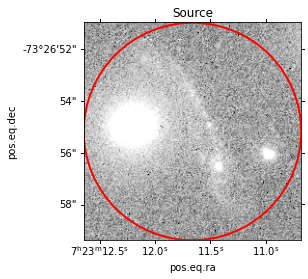

f105w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f105w-4021.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


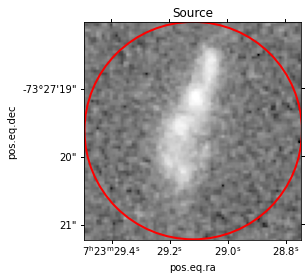

f125w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f125w-4021.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


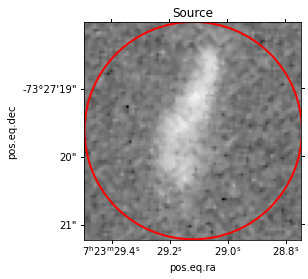

f140w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f140w-4021.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


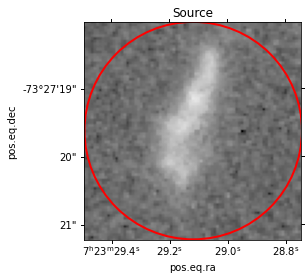

f160w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f160w-4021.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


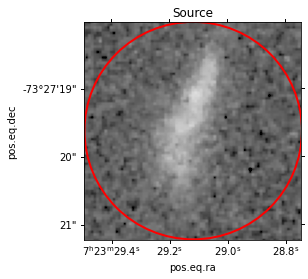

f435w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f435w-4021.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


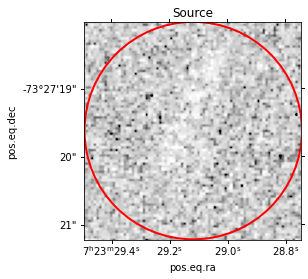

f606w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f606w-4021.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


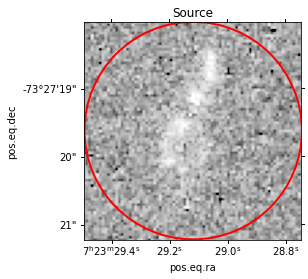

f814w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f814w-4021.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


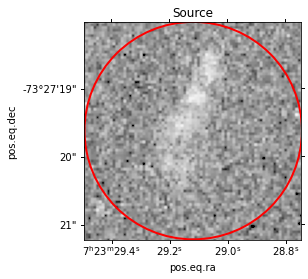

f105w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f105w-4193.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


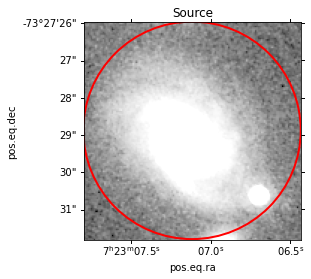

f125w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f125w-4193.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


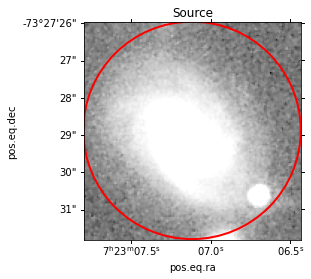

f140w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f140w-4193.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


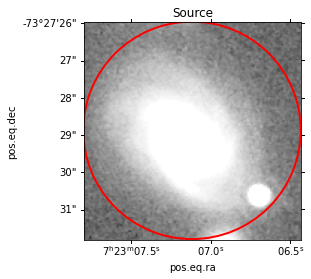

f160w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f160w-4193.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


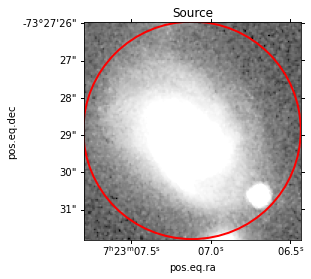

f435w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f435w-4193.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


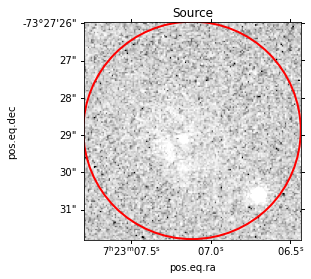

f606w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f606w-4193.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


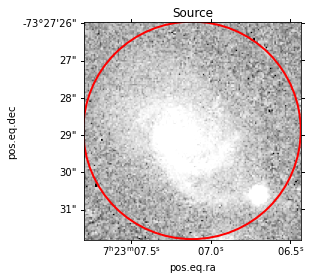

f814w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f814w-4193.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


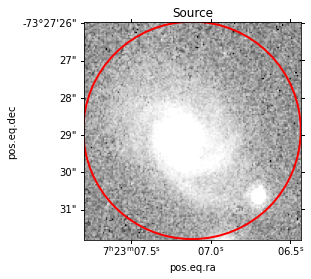

f105w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f105w-4878.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


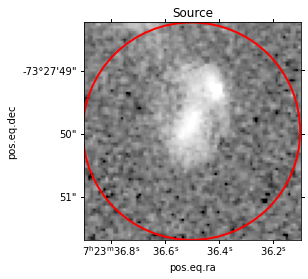

f125w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f125w-4878.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


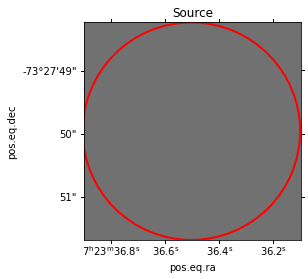

f140w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f140w-4878.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


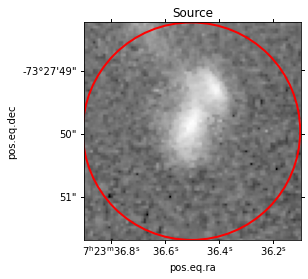

f160w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f160w-4878.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


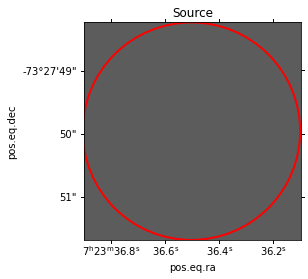

f435w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f435w-4878.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


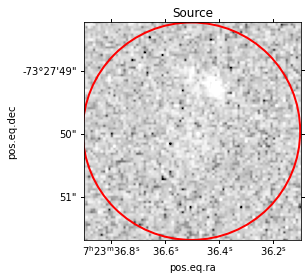

f606w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f606w-4878.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


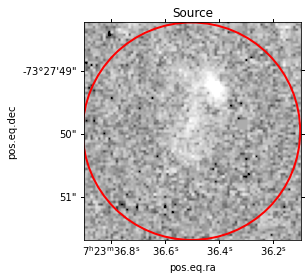

f814w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f814w-4878.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


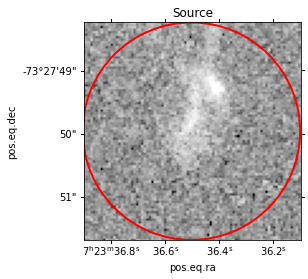

f105w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f105w-5276.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


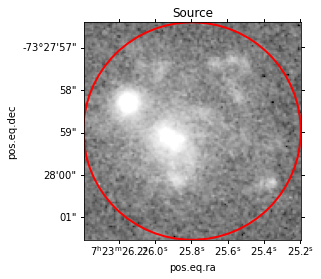

f125w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f125w-5276.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


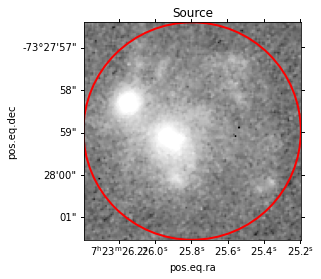

f140w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f140w-5276.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


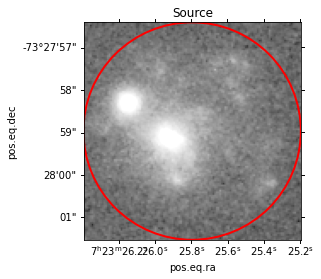

f160w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f160w-5276.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


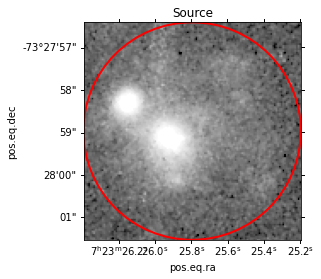

f435w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f435w-5276.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


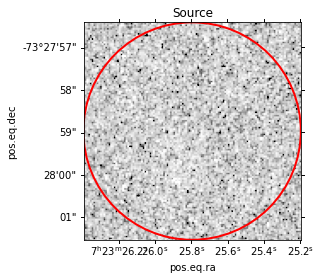

f606w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f606w-5276.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


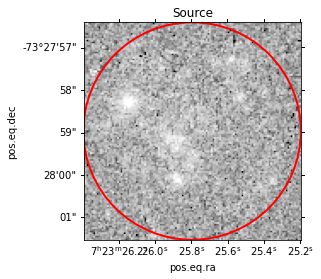

f814w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f814w-5276.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


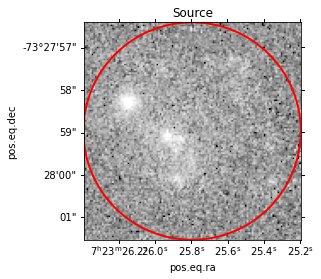

f105w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f105w-5364.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


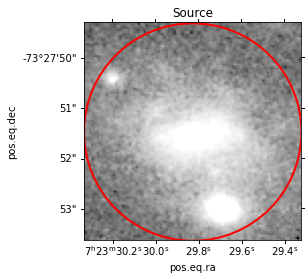

f125w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f125w-5364.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


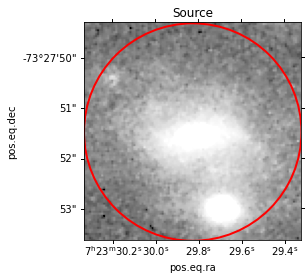

f140w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f140w-5364.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


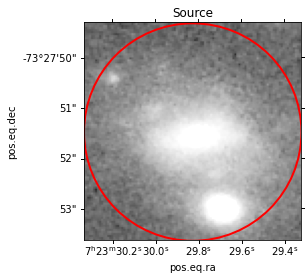

f160w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f160w-5364.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


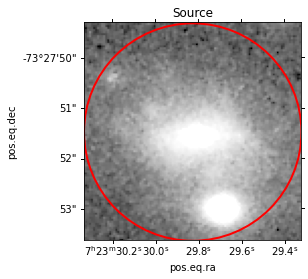

f435w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f435w-5364.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


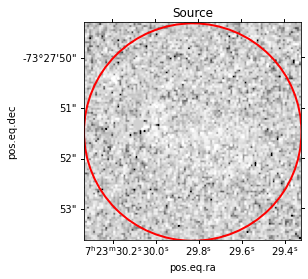

f606w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f606w-5364.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


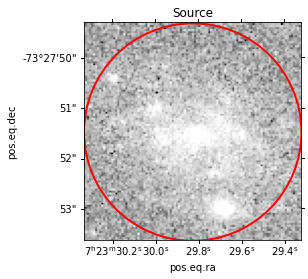

f814w

Thumbnail saved as: /Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/f814w-5364.fits


<ipython-input-14-edcd14722252>:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_to2,overwrite=True,facecolor='white')


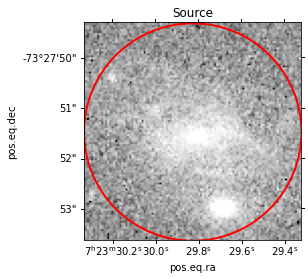


343.7161750793457 seconds
5.728602917989095 minutes


In [16]:
t0 = time.time()

root = '/Users/brian.merino/Desktop/JWST/RELICS/thumbnails/'
filter_list = ['f105w', 'f125w', 'f140w', 'f160w', 'f435w', 'f606w', 'f814w']

for j in range(0,len(prephot)):
    cluster = 'smacs0723'
    Id  = prephot["ID"][j]
    ra  = prephot["ra"][j]
    dec = prephot["dec"][j]
    rad = prephot["rad_pix"][j]
    length = rad
    
    for item in filter_list:
        save_to = root + 'sci/%s-%i.fits'%(item,Id)
        save_to_wht = root + 'wht/%s-%i_wht.fits'%(item,Id)
        Quick(cluster,item,ra,dec,rad)
        
t1 = time.time()
total = t1-t0
total_min = total/60
print()
print(total, 'seconds')
print(total_min, 'minutes')        